<a href="https://colab.research.google.com/github/risa1796/EDA-ML-exercises/blob/main/woes_club_churn_prediction_withPycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/딥러닝기초

/content/drive/MyDrive/딥러닝기초


In [3]:
import pandas as pd 

df = pd.read_csv('./Assignment- Membership woes.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10362 entries, 0 to 10361
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MEMBERSHIP_NUMBER      10362 non-null  object 
 1   MEMBERSHIP_TERM_YEARS  10362 non-null  int64  
 2   ANNUAL_FEES            10362 non-null  float64
 3   MEMBER_MARITAL_STATUS  7765 non-null   object 
 4   MEMBER_GENDER          9751 non-null   object 
 5   MEMBER_ANNUAL_INCOME   8608 non-null   float64
 6   MEMBER_OCCUPATION_CD   10319 non-null  float64
 7   MEMBERSHIP_PACKAGE     10362 non-null  object 
 8   MEMBER_AGE_AT_ISSUE    10362 non-null  int64  
 9   ADDITIONAL_MEMBERS     10362 non-null  int64  
 10  PAYMENT_MODE           10362 non-null  object 
 11  AGENT_CODE             10362 non-null  object 
 12  MEMBERSHIP_STATUS      10362 non-null  object 
 13  START_DATE (YYYYMMDD)  10362 non-null  int64  
 14  END_DATE  (YYYYMMDD)   3143 non-null   float64
dtypes:

In [5]:
df.head()

,MEMBERSHIP_NUMBER,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE (YYYYMMDD),END_DATE (YYYYMMDD)
0,A00001,29,113125.0,M,M,25200000.0,1.0,TYPE-B,45,2,ANNUAL,477,INFORCE,20060914,NaN
1,A00002,38,112220.0,M,M,10339200.0,1.0,TYPE-B,36,3,QUARTERLY,255,INFORCE,20061102,NaN
2,A00003,12,100000.0,M,M,14400000.0,1.0,TYPE-B,42,1,ANNUAL,7866,INFORCE,20070124,NaN
3,A00004,12,100000.0,M,M,9000000.0,1.0,TYPE-B,39,2,ANNUAL,200533,INFORCE,20070122,NaN
4,A00005,46,100000.0,M,M,4800000.0,1.0,TYPE-B,27,2,QUARTERLY,6988,INFORCE,20070131,NaN


In [6]:
df.duplicated().sum()

0

In [7]:
df.MEMBER_MARITAL_STATUS.value_counts()

M    6430
S    1144
W     146
D      45
Name: MEMBER_MARITAL_STATUS, dtype: int64

In [8]:
df.MEMBER_MARITAL_STATUS.fillna('M',inplace=True)

In [9]:
df.MEMBER_MARITAL_STATUS.value_counts()

M    9027
S    1144
W     146
D      45
Name: MEMBER_MARITAL_STATUS, dtype: int64

In [10]:
df.columns

Index(['MEMBERSHIP_NUMBER', 'MEMBERSHIP_TERM_YEARS', 'ANNUAL_FEES',
       'MEMBER_MARITAL_STATUS', 'MEMBER_GENDER', 'MEMBER_ANNUAL_INCOME',
       'MEMBER_OCCUPATION_CD', 'MEMBERSHIP_PACKAGE', 'MEMBER_AGE_AT_ISSUE',
       'ADDITIONAL_MEMBERS', 'PAYMENT_MODE', 'AGENT_CODE', 'MEMBERSHIP_STATUS',
       'START_DATE (YYYYMMDD)', 'END_DATE  (YYYYMMDD)'],
      dtype='object')

In [11]:
df.drop('END_DATE  (YYYYMMDD)',axis=1,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10362 entries, 0 to 10361
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MEMBERSHIP_NUMBER      10362 non-null  object 
 1   MEMBERSHIP_TERM_YEARS  10362 non-null  int64  
 2   ANNUAL_FEES            10362 non-null  float64
 3   MEMBER_MARITAL_STATUS  10362 non-null  object 
 4   MEMBER_GENDER          9751 non-null   object 
 5   MEMBER_ANNUAL_INCOME   8608 non-null   float64
 6   MEMBER_OCCUPATION_CD   10319 non-null  float64
 7   MEMBERSHIP_PACKAGE     10362 non-null  object 
 8   MEMBER_AGE_AT_ISSUE    10362 non-null  int64  
 9   ADDITIONAL_MEMBERS     10362 non-null  int64  
 10  PAYMENT_MODE           10362 non-null  object 
 11  AGENT_CODE             10362 non-null  object 
 12  MEMBERSHIP_STATUS      10362 non-null  object 
 13  START_DATE (YYYYMMDD)  10362 non-null  int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 1.1+ 

In [13]:
df.MEMBERSHIP_STATUS.value_counts()

INFORCE      7219
CANCELLED    3143
Name: MEMBERSHIP_STATUS, dtype: int64

In [14]:
df.MEMBER_GENDER.value_counts()

M    7330
F    2421
Name: MEMBER_GENDER, dtype: int64

In [15]:
df.MEMBER_GENDER.fillna('M',inplace=True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


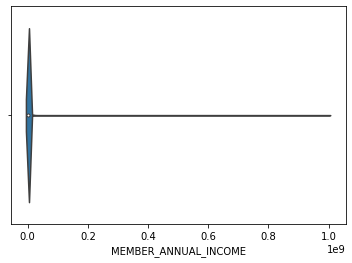

In [16]:
import seaborn as sns 

sns.violinplot(df.MEMBER_ANNUAL_INCOME)

In [17]:
df["MEMBER_ANNUAL_INCOME"].quantile(0.95)

3000000.0

In [18]:
q_hi  = df["MEMBER_ANNUAL_INCOME"].quantile(0.99)

df = df[(df["MEMBER_ANNUAL_INCOME"] < q_hi)]
df.head(2)
     

,MEMBERSHIP_NUMBER,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE (YYYYMMDD)
4,A00005,46,100000.0,M,M,4800000.0,1.0,TYPE-B,27,2,QUARTERLY,6988,INFORCE,20070131
7,A00008,12,120000.0,M,M,3600000.0,1.0,TYPE-B,28,1,QUARTERLY,13100,CANCELLED,20070312


In [19]:
print(df.MEMBER_ANNUAL_INCOME.median())
df.MEMBER_ANNUAL_INCOME.mean()

540000.0


876397.7014084507

In [20]:
income_median= df.MEMBER_ANNUAL_INCOME.median()
df.MEMBER_ANNUAL_INCOME.fillna(income_median, inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8520 entries, 4 to 10361
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MEMBERSHIP_NUMBER      8520 non-null   object 
 1   MEMBERSHIP_TERM_YEARS  8520 non-null   int64  
 2   ANNUAL_FEES            8520 non-null   float64
 3   MEMBER_MARITAL_STATUS  8520 non-null   object 
 4   MEMBER_GENDER          8520 non-null   object 
 5   MEMBER_ANNUAL_INCOME   8520 non-null   float64
 6   MEMBER_OCCUPATION_CD   8501 non-null   float64
 7   MEMBERSHIP_PACKAGE     8520 non-null   object 
 8   MEMBER_AGE_AT_ISSUE    8520 non-null   int64  
 9   ADDITIONAL_MEMBERS     8520 non-null   int64  
 10  PAYMENT_MODE           8520 non-null   object 
 11  AGENT_CODE             8520 non-null   object 
 12  MEMBERSHIP_STATUS      8520 non-null   object 
 13  START_DATE (YYYYMMDD)  8520 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 998.4+

In [22]:
df['register_month'] = df['START_DATE (YYYYMMDD)'].apply(lambda x: str(x)[4:6])

In [23]:
df['register_month'] = df.register_month.astype(int)

In [24]:
def repl_status(x):
    if x == 'INFORCE':
        x = 1
    else:
        x= 0
    return x

df['MEMBERSHIP_STATUS'] = df.MEMBERSHIP_STATUS.apply(lambda x: repl_status(x))
df['MEMBERSHIP_STATUS'] = df.MEMBERSHIP_STATUS.astype(int)

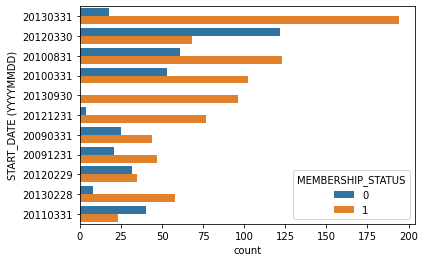

In [25]:
sns.countplot(y ='START_DATE (YYYYMMDD)',hue='MEMBERSHIP_STATUS', data = df, order=df['START_DATE (YYYYMMDD)'].value_counts().index[:11])

In [26]:
df = df[df['AGENT_CODE']!='..']

In [27]:
df.AGENT_CODE= df.AGENT_CODE.astype(int)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [28]:
df.MEMBER_OCCUPATION_CD.fillna(1.0, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


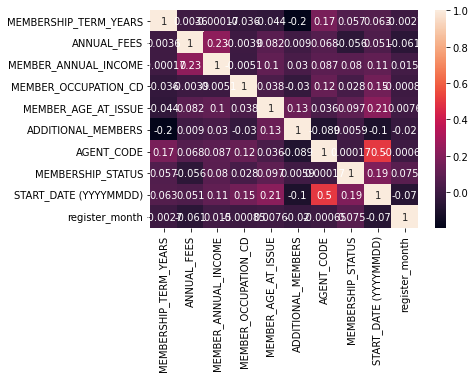

In [29]:
sns.heatmap(df.corr(),annot=True)

In [30]:
df.drop(['MEMBERSHIP_NUMBER','START_DATE (YYYYMMDD)'],axis=1,inplace=True)

In [31]:
len(df.AGENT_CODE.unique())

3872

In [32]:
max_len = len(df[df.MEMBERSHIP_STATUS==1])

In [33]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.MEMBERSHIP_STATUS==1]
df_minority = df[df.MEMBERSHIP_STATUS==0]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=max_len,    # to match majority class
                                 random_state=156) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.MEMBERSHIP_STATUS.value_counts()

1    5924
0    5924
Name: MEMBERSHIP_STATUS, dtype: int64

In [34]:
df_upsampled.select_dtypes('object')

,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBERSHIP_PACKAGE,PAYMENT_MODE
4,M,M,TYPE-B,QUARTERLY
10,M,M,TYPE-B,ANNUAL
11,M,M,TYPE-B,ANNUAL
14,M,M,TYPE-B,QUARTERLY
15,M,M,TYPE-B,ANNUAL
...,...,...,...,...
1284,M,M,TYPE-B,MONTHLY
5383,S,M,TYPE-A,MONTHLY
4732,M,M,TYPE-B,ANNUAL
6406,M,F,TYPE-B,ANNUAL


In [35]:
dummies = pd.get_dummies(df_upsampled)

In [36]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11848 entries, 4 to 6177
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   MEMBERSHIP_TERM_YEARS        11848 non-null  int64  
 1   ANNUAL_FEES                  11848 non-null  float64
 2   MEMBER_ANNUAL_INCOME         11848 non-null  float64
 3   MEMBER_OCCUPATION_CD         11848 non-null  float64
 4   MEMBER_AGE_AT_ISSUE          11848 non-null  int64  
 5   ADDITIONAL_MEMBERS           11848 non-null  int64  
 6   AGENT_CODE                   11848 non-null  int64  
 7   MEMBERSHIP_STATUS            11848 non-null  int64  
 8   register_month               11848 non-null  int64  
 9   MEMBER_MARITAL_STATUS_D      11848 non-null  uint8  
 10  MEMBER_MARITAL_STATUS_M      11848 non-null  uint8  
 11  MEMBER_MARITAL_STATUS_S      11848 non-null  uint8  
 12  MEMBER_MARITAL_STATUS_W      11848 non-null  uint8  
 13  MEMBER_GENDER_F  

In [37]:
#import sklearn methods
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, CategoricalNB
from sklearn.svm import LinearSVC,SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
import sys 
import os

In [38]:
# split df to X and Y
y = dummies.loc[:, 'MEMBERSHIP_STATUS'].values
X = dummies.drop('MEMBERSHIP_STATUS', axis=1)

# split data into 80-20 for training set / test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

# cross-validation with 5 splits
cv = StratifiedShuffleSplit(n_splits=5, random_state = 88)

#hold-out
hold_out=StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state = 88)

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_normalized_arr=scaler.transform(X_train)
X_train_normalized_df=pd.DataFrame(X_train_normalized_arr, columns=list(X.columns))

X_test_normalized_arr=scaler.transform(X_test)
X_test_normalized_df=pd.DataFrame(X_test_normalized_arr, columns=list(X.columns))

In [40]:
X_train_normalized_df

,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,AGENT_CODE,register_month,MEMBER_MARITAL_STATUS_D,MEMBER_MARITAL_STATUS_M,...,MEMBER_MARITAL_STATUS_W,MEMBER_GENDER_F,MEMBER_GENDER_M,MEMBERSHIP_PACKAGE_TYPE-A,MEMBERSHIP_PACKAGE_TYPE-B,PAYMENT_MODE_ANNUAL,PAYMENT_MODE_MONTHLY,PAYMENT_MODE_QUARTERLY,PAYMENT_MODE_SEMI-ANNUAL,PAYMENT_MODE_SINGLE-PREMIUM
0,-0.762932,-0.355153,-0.478520,0.717374,-0.893547,1.370487,-0.358643,1.720090,-0.070594,0.426548,...,-0.118386,-0.552567,0.552567,-0.639164,0.639164,-1.291358,2.051964,-0.208262,-0.404548,-0.027186
1,3.497377,-0.276399,-0.145285,0.717374,-1.293079,-1.322005,1.451584,-0.263038,-0.070594,0.426548,...,-0.118386,-0.552567,0.552567,1.564544,-1.564544,-1.291358,2.051964,-0.208262,-0.404548,-0.027186
2,-0.289564,-0.355157,-0.461832,4.146728,-0.334202,1.370487,-0.010240,1.436786,-0.070594,0.426548,...,-0.118386,-0.552567,0.552567,-0.639164,0.639164,0.774379,-0.487338,-0.208262,-0.404548,-0.027186
3,1.272549,-0.301879,-0.356308,-0.425745,-0.414109,1.370487,0.461815,0.303570,-0.070594,0.426548,...,-0.118386,1.809737,-1.809737,-0.639164,0.639164,0.774379,-0.487338,-0.208262,-0.404548,-0.027186
4,-0.762932,-0.355157,0.041478,-0.425745,0.704581,0.472990,0.523666,0.020266,-0.070594,0.426548,...,-0.118386,-0.552567,0.552567,-0.639164,0.639164,0.774379,-0.487338,-0.208262,-0.404548,-0.027186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9473,-0.526248,-0.257513,0.171262,-0.425745,0.704581,0.472990,-1.638695,0.303570,-0.070594,0.426548,...,-0.118386,-0.552567,0.552567,1.564544,-1.564544,-1.291358,2.051964,-0.208262,-0.404548,-0.027186
9474,0.373150,-0.355157,-0.488206,-0.425745,1.184019,0.472990,-0.139320,0.586874,-0.070594,0.426548,...,-0.118386,-0.552567,0.552567,-0.639164,0.639164,0.774379,-0.487338,-0.208262,-0.404548,-0.027186
9475,-0.478911,0.071065,-0.377415,-0.425745,1.823270,0.472990,0.037017,0.870178,-0.070594,0.426548,...,-0.118386,-0.552567,0.552567,-0.639164,0.639164,0.774379,-0.487338,-0.208262,-0.404548,-0.027186
9476,1.461896,-0.142046,0.382297,-0.425745,-0.733734,1.370487,0.315437,0.020266,-0.070594,0.426548,...,-0.118386,-0.552567,0.552567,-0.639164,0.639164,0.774379,-0.487338,-0.208262,-0.404548,-0.027186


In [41]:
X_train_normalized_df.isna().sum()

MEMBERSHIP_TERM_YEARS          0
ANNUAL_FEES                    0
MEMBER_ANNUAL_INCOME           0
MEMBER_OCCUPATION_CD           0
MEMBER_AGE_AT_ISSUE            0
ADDITIONAL_MEMBERS             0
AGENT_CODE                     0
register_month                 0
MEMBER_MARITAL_STATUS_D        0
MEMBER_MARITAL_STATUS_M        0
MEMBER_MARITAL_STATUS_S        0
MEMBER_MARITAL_STATUS_W        0
MEMBER_GENDER_F                0
MEMBER_GENDER_M                0
MEMBERSHIP_PACKAGE_TYPE-A      0
MEMBERSHIP_PACKAGE_TYPE-B      0
PAYMENT_MODE_ANNUAL            0
PAYMENT_MODE_MONTHLY           0
PAYMENT_MODE_QUARTERLY         0
PAYMENT_MODE_SEMI-ANNUAL       0
PAYMENT_MODE_SINGLE-PREMIUM    0
dtype: int64

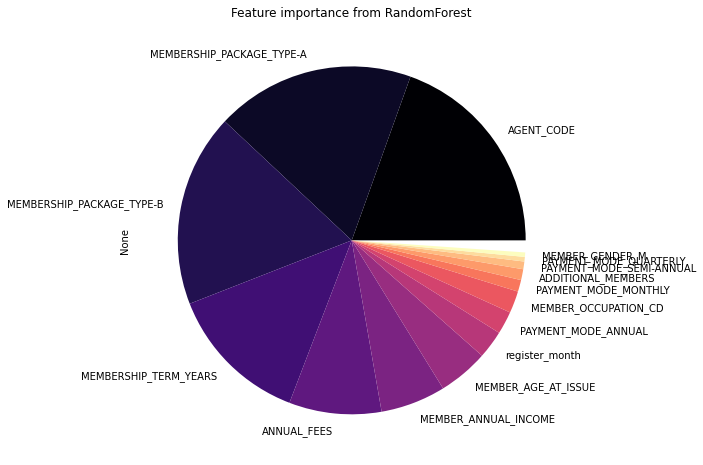

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 500, max_depth=5)
rf.fit(X_train_normalized_df, y_train)
rf_y_pred = rf.predict(X_test_normalized_df)

pd.Series(rf.feature_importances_, index = X_train_normalized_df.columns).nlargest(15).plot(kind = 'pie',
                                                                               figsize = (8, 8),
                                                                              title = 'Feature importance from RandomForest', colormap='magma')

In [43]:
import numpy as np 
# display test scores and return result string and indexes of false samples
def display_test_scores(test, pred):
    str_out = "\n"
    str_out += ("#####  TEST SCORES  #####\n--------------------")
    str_out += ("\n")

    #print accuracy
    accuracy = accuracy_score(test, pred)
    str_out += ("ACCURACY: {:.4f}\n".format(accuracy))
    str_out += ("\n")

    #print AUC score
    auc = roc_auc_score(test, pred)
    str_out += ("AUC: {:.4f}\n".format(auc))
    str_out += ("\n")

    #print confusion matrix
    str_out += ("CONFUSION MATRIX:\n--------------------\n")
    conf_mat = confusion_matrix(test, pred)
    str_out += ("{}".format(conf_mat))
    str_out += ("\n")
    str_out += ("\n--------------------\n")

    #print classification report
    str_out += ("{}".format(classification_report(test, pred)))
    
    false_indexes = np.where(test != pred)
    return str_out, false_indexes

In [44]:
import time 

# decision tree with "gini"
dt_1 = DecisionTreeClassifier(random_state = 0, criterion="gini")

# parameters 
parameters = {
                "splitter": ["best","random"],
                "class_weight": [None, "balanced"],
                "max_depth": [3,5,9, 11, 13, 15, 17, None]
                }

start_time=time.time()##

# grid search for parameters
grid_1 = GridSearchCV(estimator=dt_1, param_grid=parameters, cv=cv, n_jobs=-1)
grid_1.fit(X_train_normalized_df, y_train)

# print best scores
print("The best parameters are %s with a score of %0.4f"
      % (grid_1.best_params_, grid_1.best_score_))

################################################
# detailed dataframe of gridsearch

#detailed_grid_results = pd.DataFrame(grid.cv_results_)
#detailed_grid_results


################################################

# prediction results
y_pred = grid_1.predict(X_test_normalized_df)

end_time=time.time()##
print("\nRun time for train&test cv (DT-gini): ",end_time-start_time)

# print accuracy metrics
results, false = display_test_scores(y_test, y_pred)
print(results)

The best parameters are {'class_weight': None, 'max_depth': None, 'splitter': 'best'} with a score of 0.8158

Run time for train&test cv (DT-gini):  6.449927806854248

#####  TEST SCORES  #####
--------------------
ACCURACY: 0.8321

AUC: 0.8321

CONFUSION MATRIX:
--------------------
[[1093   92]
 [ 306  879]]

--------------------
              precision    recall  f1-score   support

           0       0.78      0.92      0.85      1185
           1       0.91      0.74      0.82      1185

    accuracy                           0.83      2370
   macro avg       0.84      0.83      0.83      2370
weighted avg       0.84      0.83      0.83      2370



In [45]:
# decision tree with "entropy" gain_ratio
dt_2 = DecisionTreeClassifier(random_state = 0, criterion="entropy")

# parameters 
parameters = {
                "splitter": ["best","random"],
                "class_weight": [None, "balanced"],
                "max_depth": [11, 13, 15, 17, 19, 21, None]
                }

start_time=time.time()##

# grid search for parameters
grid_2 = GridSearchCV(estimator=dt_2, param_grid=parameters, cv=cv, n_jobs=-1)
grid_2.fit(X_train_normalized_df, y_train)

# print best scores
print("The best parameters are %s with a score of %0.4f"
      % (grid_2.best_params_, grid_2.best_score_))

########################################

# prediction results
y_pred = grid_2.predict(X_test_normalized_df)

end_time=time.time()##
print("\nRun time for train&test cv (DT-gain ratio): ",end_time-start_time)

# print accuracy metrics
results, false = display_test_scores(y_test, y_pred)
print(results)

The best parameters are {'class_weight': None, 'max_depth': None, 'splitter': 'best'} with a score of 0.8141

Run time for train&test cv (DT-gain ratio):  5.197403192520142

#####  TEST SCORES  #####
--------------------
ACCURACY: 0.8477

AUC: 0.8477

CONFUSION MATRIX:
--------------------
[[1089   96]
 [ 265  920]]

--------------------
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1185
           1       0.91      0.78      0.84      1185

    accuracy                           0.85      2370
   macro avg       0.85      0.85      0.85      2370
weighted avg       0.85      0.85      0.85      2370



In [46]:
'''from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score

import time

start_time = time.time()

params = {

'n_estimators':[950],

'learning_rate':[0.6,0.65,0.7,0.8,0.9]

}

gb_clf = GradientBoostingClassifier(random_state=0)

gb_clf.fit(X_train_normalized_df, y_train)

grid_rf = GridSearchCV(gb_clf, param_grid=params, cv=cv, n_jobs=-1)

grid_rf.fit(X_train_normalized_df, y_train)

print('최적 하이퍼 파라미터 : \n', grid_rf.best_params_)

print('최고 예측 정확도 : ', round(grid_rf.best_score_,4))

########################################

# prediction results
y_pred = grid_rf.predict(X_test_normalized_df)

end_time=time.time()##
print("\nRun time for train&test cv: ",end_time-start_time)

# print accuracy metrics
results, false = display_test_scores(y_test, y_pred)
print(results)'''

'from sklearn.model_selection import GridSearchCV\n\nfrom sklearn.ensemble import GradientBoostingClassifier\n\nfrom sklearn.metrics import accuracy_score\n\nimport time\n\nstart_time = time.time()\n\nparams = {\n\n\'n_estimators\':[950],\n\n\'learning_rate\':[0.6,0.65,0.7,0.8,0.9]\n\n}\n\ngb_clf = GradientBoostingClassifier(random_state=0)\n\ngb_clf.fit(X_train_normalized_df, y_train)\n\ngrid_rf = GridSearchCV(gb_clf, param_grid=params, cv=cv, n_jobs=-1)\n\ngrid_rf.fit(X_train_normalized_df, y_train)\n\nprint(\'최적 하이퍼 파라미터 : \n\', grid_rf.best_params_)\n\nprint(\'최고 예측 정확도 : \', round(grid_rf.best_score_,4))\n\n########################################\n\n# prediction results\ny_pred = grid_rf.predict(X_test_normalized_df)\n\nend_time=time.time()##\nprint("\nRun time for train&test cv: ",end_time-start_time)\n\n# print accuracy metrics\nresults, false = display_test_scores(y_test, y_pred)\nprint(results)'

In [47]:
#!pip install pycaret

In [48]:
#!pip install numba==0.53

In [49]:
from pycaret.classification import *

In [52]:
X_train_normalized_df.head()

,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,AGENT_CODE,register_month,MEMBER_MARITAL_STATUS_D,MEMBER_MARITAL_STATUS_M,MEMBER_MARITAL_STATUS_S,MEMBER_MARITAL_STATUS_W,MEMBER_GENDER_F,MEMBER_GENDER_M,MEMBERSHIP_PACKAGE_TYPE-A,MEMBERSHIP_PACKAGE_TYPE-B,PAYMENT_MODE_ANNUAL,PAYMENT_MODE_MONTHLY,PAYMENT_MODE_QUARTERLY,PAYMENT_MODE_SEMI-ANNUAL,PAYMENT_MODE_SINGLE-PREMIUM
0,-0.762932,-0.355153,-0.478520,0.717374,-0.893547,1.370487,-0.358643,1.720090,-0.070594,0.426548,-0.395318,-0.118386,-0.552567,0.552567,-0.639164,0.639164,-1.291358,2.051964,-0.208262,-0.404548,-0.027186
1,3.497377,-0.276399,-0.145285,0.717374,-1.293079,-1.322005,1.451584,-0.263038,-0.070594,0.426548,-0.395318,-0.118386,-0.552567,0.552567,1.564544,-1.564544,-1.291358,2.051964,-0.208262,-0.404548,-0.027186
2,-0.289564,-0.355157,-0.461832,4.146728,-0.334202,1.370487,-0.010240,1.436786,-0.070594,0.426548,-0.395318,-0.118386,-0.552567,0.552567,-0.639164,0.639164,0.774379,-0.487338,-0.208262,-0.404548,-0.027186
3,1.272549,-0.301879,-0.356308,-0.425745,-0.414109,1.370487,0.461815,0.303570,-0.070594,0.426548,-0.395318,-0.118386,1.809737,-1.809737,-0.639164,0.639164,0.774379,-0.487338,-0.208262,-0.404548,-0.027186
4,-0.762932,-0.355157,0.041478,-0.425745,0.704581,0.472990,0.523666,0.020266,-0.070594,0.426548,-0.395318,-0.118386,-0.552567,0.552567,-0.639164,0.639164,0.774379,-0.487338,-0.208262,-0.404548,-0.027186


In [69]:
df_upsampled.head()

,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,register_month
4,46,100000.0,M,M,4800000.0,1.0,TYPE-B,27,2,QUARTERLY,6988,1,1
10,12,1000000.0,M,M,5047008.0,1.0,TYPE-B,38,3,ANNUAL,11933,1,3
11,39,100000.0,M,M,3600000.0,1.0,TYPE-B,35,3,ANNUAL,9499,1,3
14,12,100000.0,M,M,8400000.0,1.0,TYPE-B,39,3,QUARTERLY,12199,1,3
15,12,600000.0,M,M,1740000.0,1.0,TYPE-B,36,1,ANNUAL,11933,1,3


In [59]:
pycaret_df = pd.concat([X_train_normalized_df,pd.DataFrame(y_train, columns=['target'])],axis=1)

In [68]:
import logging
logging.disable(logging.CRITICAL)

In [65]:
clf1 = setup(data = df_upsampled, 
             target = 'MEMBERSHIP_STATUS',
             silent = True)

,Description,Value
0,session_id,4573
1,Target,MEMBERSHIP_STATUS
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(11848, 13)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='MEMBERSHIP_STATUS',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                n...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'p

In [66]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8303,0.9201,0.8100,0.8449,0.8269,0.6607,0.6615,0.858
rf,Random Forest Classifier,0.8273,0.9279,0.7792,0.8628,0.8187,0.6547,0.6579,0.913
dt,Decision Tree Classifier,0.7972,0.7966,0.7203,0.8513,0.7803,0.5944,0.6016,0.057
lightgbm,Light Gradient Boosting Machine,0.7493,0.8292,0.6589,0.8051,0.7245,0.4987,0.5073,0.155
gbc,Gradient Boosting Classifier,0.6960,0.7639,0.5981,0.7441,0.6630,0.3921,0.4000,0.979
knn,K Neighbors Classifier,0.6759,0.7356,0.6181,0.6994,0.6560,0.3518,0.3544,0.121
ada,Ada Boost Classifier,0.6659,0.7288,0.6032,0.6897,0.6434,0.3318,0.3345,0.333
ridge,Ridge Classifier,0.6307,0.0000,0.5246,0.6662,0.5868,0.2614,0.2676,0.028
lda,Linear Discriminant Analysis,0.6299,0.6765,0.5246,0.6650,0.5863,0.2599,0.2660,0.063
lr,Logistic Regression,0.5472,0.5782,0.4928,0.5534,0.5210,0.0945,0.0951,0.042


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=4573, verbose=0,
                     warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=4573, verbose=0,
                     warm_start=False)

In [76]:
rf = create_model('rf')    

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8217,0.9287,0.7735,0.8560,0.8127,0.6434,0.6464
1,0.8229,0.9276,0.7735,0.8583,0.8137,0.6458,0.6490
2,0.8157,0.9170,0.7735,0.8447,0.8075,0.6313,0.6336
3,0.8444,0.9434,0.7880,0.8886,0.8352,0.6888,0.6933
4,0.8287,0.9270,0.7855,0.8602,0.8212,0.6575,0.6599
5,0.8516,0.9490,0.7831,0.9078,0.8409,0.7033,0.7100
6,0.8154,0.9147,0.7759,0.8429,0.8080,0.6309,0.6329
7,0.8275,0.9334,0.7880,0.8560,0.8206,0.6550,0.6571
8,0.8070,0.9083,0.7705,0.8307,0.7995,0.6140,0.6156


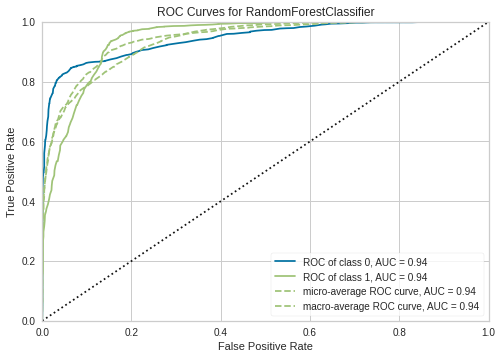

In [77]:
plot_model(estimator = rf, plot = 'auc')

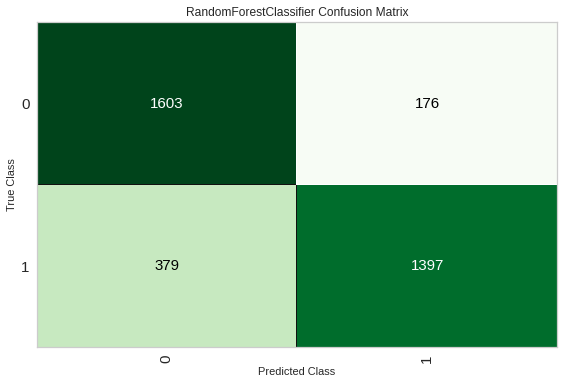

In [78]:
plot_model(estimator = rf, plot = 'confusion_matrix')

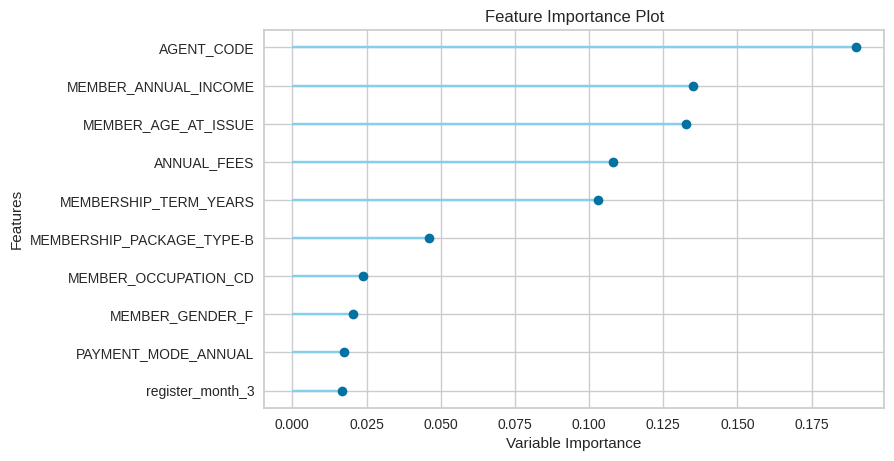

In [79]:
plot_model(estimator = rf, plot = 'feature')

In [80]:
#interpret_model(rf)

KeyboardInterrupt: ignored

In [84]:
et  = create_model('et');          

blend = blend_models(estimator_list=[rf,et])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8349,0.9301,0.8096,0.8528,0.8307,0.6699,0.6707
1,0.8349,0.9229,0.8193,0.8458,0.8323,0.6699,0.6702
2,0.8253,0.9197,0.8072,0.8375,0.8221,0.6506,0.6510
3,0.8540,0.9428,0.8217,0.8789,0.8493,0.7081,0.7096
4,0.8275,0.9214,0.8193,0.8333,0.8262,0.6550,0.6551
5,0.8661,0.9495,0.8217,0.9021,0.8600,0.7322,0.7352
6,0.8263,0.9186,0.8096,0.8379,0.8235,0.6526,0.6530
7,0.8359,0.9345,0.8000,0.8623,0.8300,0.6719,0.6737
8,0.8154,0.9127,0.8043,0.8222,0.8132,0.6309,0.6310


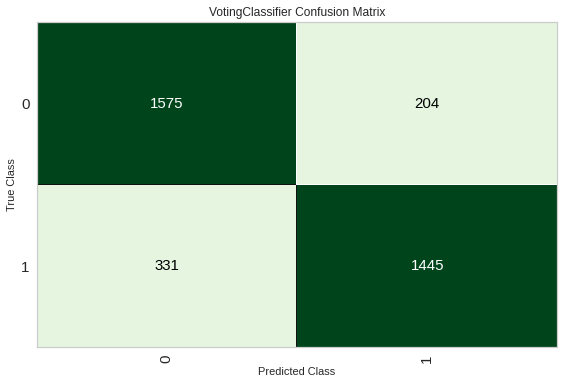

In [85]:
plot_model(estimator = blend, plot = 'confusion_matrix')